## Installing the necessary Libraries

In [5]:
pip install tensorflow


  Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl.metadata (3.2 kB)
  Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.17.0-cp312-cp312-win_amd64.whl (2.0 kB)
Using cached tensorflow_intel-2.17.0-cp312-cp312-win_amd64.whl (385.2 MB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\S566978\\AppData\\Local\\anaconda3\\Lib\\site-packages\\keras\\src\\backend\\jax\\linalg.py'
Consider using the `--user` option or check the permissions.



In [7]:
pip install opencv-python --prefer-binary

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 667.8 kB/s eta 0:00:59
   ---------------------------------------- 0.2/38.8 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.5/38.8 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.9/38.8 MB 4.5 MB/s eta 0:00:09
   - -------------------------------------- 1.5/38.8 MB 6.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.4/38.8 MB 8.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/38.8 MB 7.9 MB/s eta 0:00:05
   --- ------------------------------------ 3.4/38.8 MB 9.0 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/38.8 MB 9.5 MB/s eta 0:00:04
   ---- ----------------------------------- 4.4/38.8 MB 9.3 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/38.8 MB 10.4 MB/s eta 0:00:04
   ----- ---------------------------------- 5.3/38.8 MB 9.6 MB/s eta 0:00:04
   

## Importing the necessary Libraries

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import pandas as pd
import shutil
import time
import cv2 as cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML
print("import done")

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 435.7 kB/s eta 0:00:01
     ----------------------- -------------- 30.7/48.7 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 205.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.2 MB 245.8 kB/s eta 0:26:08
   ---------------------------------------- 0.1/385.2 MB 363.1 kB/s eta 0:17:41
   ---------------------------------------- 0.1/385.2 MB 301.2 kB/s eta 0:21:19
   ----------------

C:\Users\S566978\AppData\Local\Temp\ipykernel_7456\3356937259.py:24: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [11]:
tf.test.gpu_device_name()

''

## Getting the current Directory

In [13]:
current_dir = os.getcwd()
print(current_dir)

C:\Users\S566978\Videos


## Dataset Preparation

In this section, we will define the directory paths for the DRISHTI-GS dataset and load the images for both glaucoma and normal cases.


In [21]:
import os
# Define the directory for the dataset
current_dir = "DRISHTI-GS_updated"  # Adjust this to your actual path
train_glaucoma_dir =  "DRISHTI-GS_updated/Training/glaucoma"
train_normal_dir =  "DRISHTI-GS_updated/Training/normal"
test_glaucoma_dir =  "DRISHTI-GS_updated/Testing/glaucoma"
test_normal_dir =  "DRISHTI-GS_updated/Testing/normal"

# Load images from the directories
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir) + os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir) + os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")

Dristhi dataset contains :
	70 images representing an eye with glaucoma
	31 images representing a normal eye


## Display Sample Images

This code uses Keras and Matplotlib to display sample images from the DRISHTI-GS dataset.

### Overview

- **Function**: `display_images(title, image_list, directory)` shows four images from a specified directory.
- **Outputs**: Displays sample glaucoma and normal images.

### Purpose

Visualize images for glaucoma detection analysis.


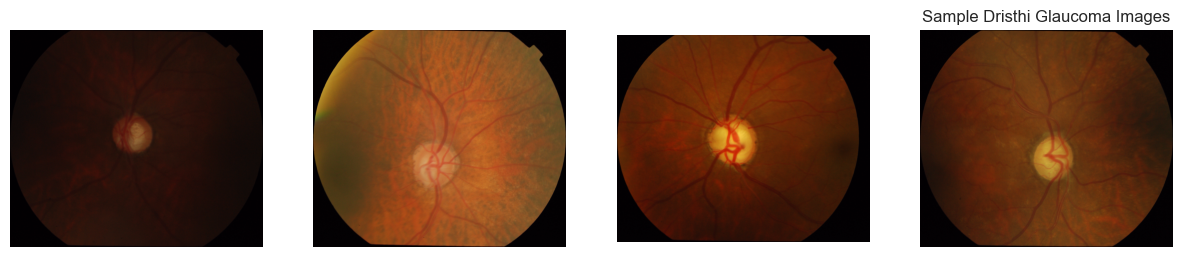

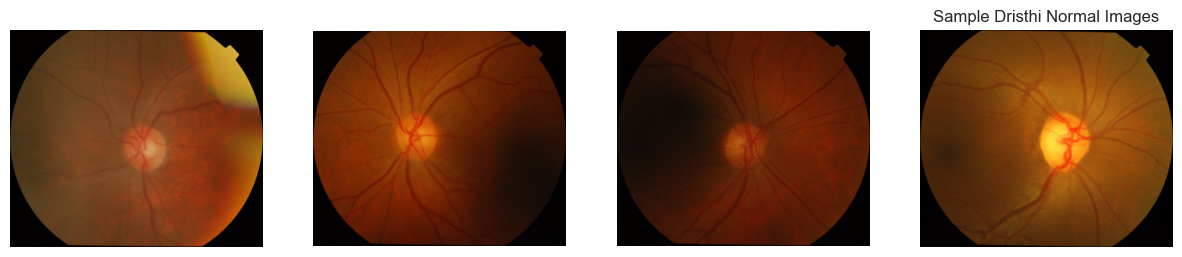

In [23]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

def display_images(title, image_list, directory):
    plt.figure(figsize=(15, 10))
    for i in range(4):  # Displaying 4 images
        img = load_img(os.path.join(directory, image_list[i]))
        plt.subplot(1, 4, i + 1)  # Create subplot
        plt.imshow(img)  # Show image
        plt.axis('off')  # Hide axes

    plt.title(title)  # title
    plt.show()

# Display sample glaucoma images
display_images( "Sample Dristhi Glaucoma Images", dristhi_glaucoma_images, train_glaucoma_dir)

# Display sample normal images
display_images( "Sample Dristhi Normal Images", dristhi_normal_images, train_normal_dir)


## Dataset Preparation

In this section, we will define the directory paths for the ORIGA dataset and load the images for both glaucoma and normal cases.


In [25]:
import os

# Define the directory for the dataset
origa_dir = 'ORIGA'  # Adjust this to your actual path
train_glaucoma_dir =  "ORIGA/Training/glaucoma"
train_normal_dir =  "ORIGA/Training/normal"
test_glaucoma_dir =  "ORIGA/Testing/glaucoma"
test_normal_dir =  "ORIGA/Testing/normal"

# Load images from the directories
origa_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
origa_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("ORIGA dataset contains :")
print(f"\t{len(origa_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(origa_normal_images)} images representing a normal eye")


ORIGA dataset contains :
	168 images representing an eye with glaucoma
	482 images representing a normal eye


## Display Sample Images

This code uses Keras and Matplotlib to display sample images from the ORIGA dataset.

### Overview

- **Function**: `display_images(title, image_list, directory)` shows four images from a specified directory.
- **Outputs**: Displays sample glaucoma and normal images.

### Purpose

Visualize images for glaucoma detection analysis.


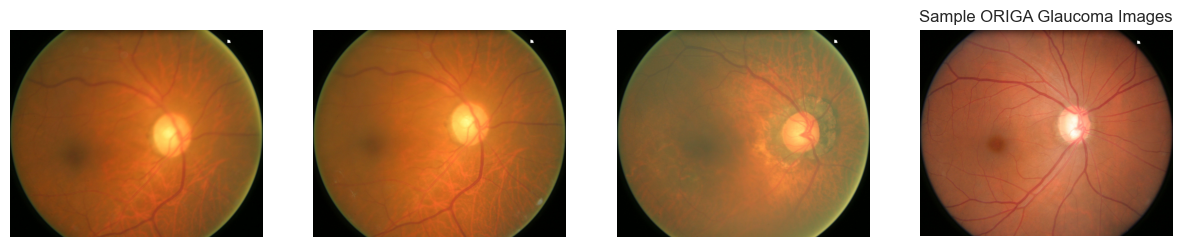

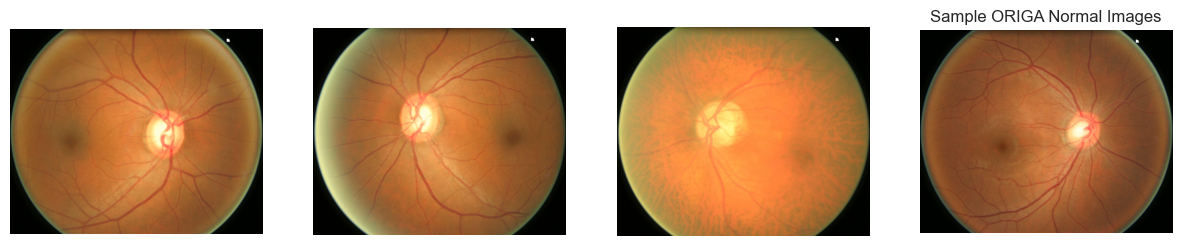

In [27]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

def display_images(title, image_list, directory):
    plt.figure(figsize=(15, 10))
    for i in range(4):  # Displaying 4 images
        img = load_img(os.path.join(directory, image_list[i]))
        plt.subplot(1, 4, i + 1)  # Create subplot
        plt.imshow(img)  # Show image
        plt.axis('off')  # Hide axes

    plt.title(title)  # title
    plt.show()

# Display sample glaucoma images
display_images( "Sample ORIGA Glaucoma Images", origa_glaucoma_images, train_glaucoma_dir)

# Display sample normal images
display_images( "Sample ORIGA Normal Images", origa_normal_images, train_normal_dir)


## Dataset Preparation

In this section, we will define the directory paths for the G1020 dataset and load the images for both glaucoma and normal cases.


In [29]:
import os

# Define the directory for the dataset
g1020_dir = 'G1020'  # Adjust this to your actual path
train_glaucoma_dir =  "G1020/Training/glaucoma"
train_normal_dir =  "G1020/Training/normal"
test_glaucoma_dir =  'G1020/Testing/glaucoma'
test_normal_dir =  'G1020/Testing/normal'

# Load images from the directories
g1020_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
g1020_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("G1020 dataset contains :")
print(f"\t{len(g1020_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(g1020_normal_images)} images representing a normal eye")


G1020 dataset contains :
	296 images representing an eye with glaucoma
	724 images representing a normal eye


## Display Sample Images

This code uses Keras and Matplotlib to display sample images from the G1020 dataset.

### Overview

- **Function**: `display_images(title, image_list, directory)` shows four images from a specified directory.
- **Outputs**: Displays sample glaucoma and normal images.

### Purpose

Visualize images for glaucoma detection analysis.


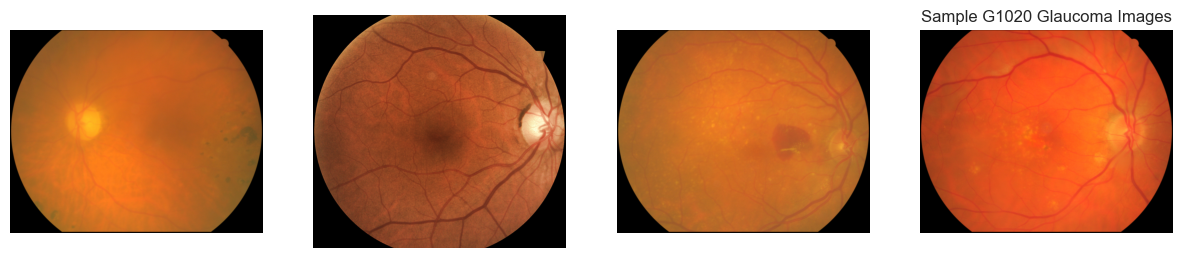

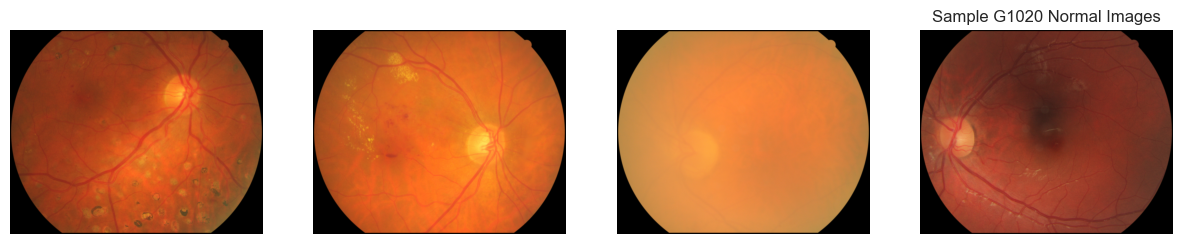

In [31]:
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

def display_images(title, image_list, directory):
    plt.figure(figsize=(15, 10))
    for i in range(4):  # Displaying 4 images
        img = load_img(os.path.join(directory, image_list[i]))
        plt.subplot(1, 4, i + 1)  # Create subplot
        plt.imshow(img)  # Show image
        plt.axis('off')  # Hide axes

    plt.title(title)  # title
    plt.show()

# Display sample glaucoma images
display_images( "Sample G1020 Glaucoma Images", g1020_glaucoma_images, train_glaucoma_dir)

# Display sample normal images
display_images( "Sample G1020 Normal Images", g1020_normal_images, train_normal_dir)

## Create a New Folder in Python

This Python code snippet demonstrates how to create a new folder in the current working directory.

In [33]:
import os

new_folder_name = "Combination2"  # Change this to your desired folder name

current_dir = os.getcwd()

new_folder_path = os.path.join(current_dir, new_folder_name)

os.makedirs(new_folder_path, exist_ok=True)  # exist_ok=True prevents an error if the folder already exists

print(f"Folder '{new_folder_name}' created at: {new_folder_path}")


Folder 'Combination2' created at: C:\Users\S566978\Videos\Combination2


## Data Preparation for Glaucoma and Normal Images

This code segment defines paths for various datasets containing glaucoma and normal images and consolidates them into two separate directories.

In [35]:
## define your paths for glaucoma####

g_path2 = 'ORIGA/Training/glaucoma'
g_path3 ='ORIGA/Testing/glaucoma'
g_path4='DRISHTI-GS_updated/Training/glaucoma'
g_path5='DRISHTI-GS_updated/Testing/glaucoma'
g_path6='G1020/Testing/glaucoma'
g_path7='G1020/Training/glaucoma'
g_dest='Combination2/Glaucoma'

os.mkdir(g_dest)
g_list=[g_path2, g_path3, g_path4, g_path5,g_path6,g_path7]

for i in g_list:
  shutil.copytree(i, g_dest, dirs_exist_ok=True)
print("Number of Glaucoma Images: ",len(os.listdir('Combination2/Glaucoma')))

##################################################
#normal

n_path2='ORIGA/Training/normal'
n_path3='ORIGA/Testing/normal'
n_path4='DRISHTI-GS_updated/Training/normal'
n_path5='DRISHTI-GS_updated/Training/normal'
n_path6='G1020/Testing/normal'
n_path7='G1020/Training/normal'
n_dest= 'Combination2/Normal'
os.mkdir(n_dest)
n_list=[n_path2, n_path3,n_path4,n_path5,n_path6,n_path7]

for i in n_list:
  shutil.copytree(i,n_dest, dirs_exist_ok=True)
print("Number of Normal Images: ",len(os.listdir(n_dest)))

Number of Glaucoma Images:  534
Number of Normal Images:  1224


## Image Dataset Analysis in Python

This Python code snippet analyzes and visualizes the number of images in a dataset containing images of glaucoma and normal cases.


Total images: 1758
Total number of classes: 2
Total glaucoma images: 534
Total normal images: 1224


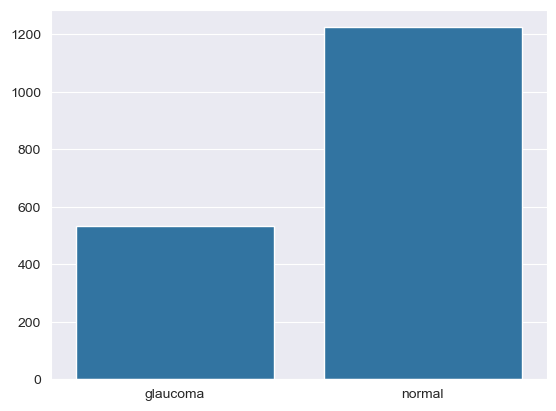

In [39]:
import pathlib
import os
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
import seaborn as sns
base_dir = 'Combination2'
base_dir = pathlib.Path(base_dir)

glaucoma = [fn for fn in os.listdir(f'Combination2/Glaucoma')]
normal = [fn for fn in os.listdir(f'Combination2/Normal')]
data=[glaucoma,normal]
dataset_classes =['glaucoma','normal']

image_count = len(list(base_dir.glob('*/*.jpg')))+len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
  print(f'Total {x} images: {len(data[count])}')
  data_count.append(len(data[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()

## Dataset Splitting and Organization Script

This Python script is designed to split a dataset of images for a binary classification task (in this case, detecting glaucoma) into three subsets: training, validation, and testing. The images are organized into separate folders based on their labels (`Glaucoma` and `Normal`). 


In [41]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Path to your dataset and where the split will be saved
dataset_path = 'Combination2'
output_dir = 'split_combination'

# Get all image file paths and their labels
filepaths = []
labels = []

for label in ['Glaucoma', 'Normal']:
    class_dir = os.path.join(dataset_path, label)
    for img_file in os.listdir(class_dir):
        filepaths.append(os.path.join(class_dir, img_file))
        labels.append(label)

# Create a DataFrame with filepaths and labels
df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

# Split data into train (70%) and temp (30%) for further splitting
train_split = 0.7
valid_split = 0.15
test_split = 0.15

train_df, temp_df = train_test_split(df, train_size=train_split, stratify=df['labels'], random_state=123)

# Split the remaining 30% into validation (15%) and test (15%)
valid_df, test_df = train_test_split(temp_df, train_size=valid_split / (valid_split + test_split), 
                                     stratify=temp_df['labels'], random_state=123)

# Function to copy files to respective directories
def copy_files(df, split_name):
    for _, row in df.iterrows():
        img_file = row['filepaths']
        label = row['labels']
        split_dir = os.path.join(output_dir, split_name, label)
        if not os.path.exists(split_dir):
            os.makedirs(split_dir)
        shutil.copy(img_file, split_dir)

# Create and save the train, validation, and test sets
copy_files(train_df, 'train')
copy_files(valid_df, 'validation')
copy_files(test_df, 'test')

# Print the lengths of the splits
print(f'Training set size: {len(train_df)}')
print(f'Validation set size: {len(valid_df)}')
print(f'Test set size: {len(test_df)}')


Training set size: 1230
Validation set size: 264
Test set size: 264
